## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [21]:
df = pd.read_csv("QueryResults.csv", names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [22]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [23]:
df.shape

(2103, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [44]:
df.count()



DATE     2103
TAG      2103
POSTS    2103
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [43]:
sorted_desc_tag = df.groupby("TAG").sum().sort_values('POSTS', ascending=False)
sorted_desc_tag

,POSTS
TAG,
javascript,2188155
java,1760684
python,1679313
c#,1468635
php,1394660
c++,717512
r,394257
c,354652
swift,292098


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [48]:
df.groupby("TAG").count().sort_values("DATE", ascending=False)

,DATE,POSTS
TAG,,
c#,153,153
assembly,152,152
c,152,152
c++,152,152
delphi,152,152
java,152,152
javascript,152,152
perl,152,152
php,152,152


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [50]:
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


## Data Manipulation



In [51]:
pivoted_data = df.pivot(index="DATE", columns="TAG", values="POSTS")
pivoted_data


TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,510.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,72.0,NaN
2008-09-01,28.0,320.0,1650.0,753.0,105.0,NaN,1136.0,639.0,131.0,481.0,541.0,6.0,289.0,NaN
2008-10-01,15.0,303.0,1990.0,811.0,112.0,NaN,1153.0,725.0,127.0,615.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,580.0,97.0,503.0,452.0,1.0,160.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-01,414.0,2902.0,6815.0,4752.0,210.0,601.0,10319.0,18215.0,152.0,5558.0,26032.0,5605.0,587.0,2630.0
2020-12-01,318.0,2798.0,6532.0,4866.0,213.0,581.0,9417.0,18621.0,131.0,5605.0,25680.0,4956.0,560.0,2456.0
2021-01-01,338.0,2773.0,7014.0,4578.0,211.0,609.0,9694.0,19793.0,146.0,5780.0,26728.0,5031.0,591.0,2794.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [52]:
pivoted_data.shape

(153, 14)

In [53]:
pivoted_data.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [54]:
pivoted_data.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,510.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,72.0,NaN
2008-09-01,28.0,320.0,1650.0,753.0,105.0,NaN,1136.0,639.0,131.0,481.0,541.0,6.0,289.0,NaN
2008-10-01,15.0,303.0,1990.0,811.0,112.0,NaN,1153.0,725.0,127.0,615.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,580.0,97.0,503.0,452.0,1.0,160.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [55]:
pivoted_data.count()

TAG
assembly      152
c             152
c#            153
c++           152
delphi        152
go            137
java          152
javascript    152
perl          152
php           152
python        152
r             150
ruby          152
swift         143
dtype: int64

In [56]:
pivoted_data = pivoted_data.fillna(0)
pivoted_data.head()


TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,510.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,72.0,0.0
2008-09-01,28.0,320.0,1650.0,753.0,105.0,0.0,1136.0,639.0,131.0,481.0,541.0,6.0,289.0,0.0
2008-10-01,15.0,303.0,1990.0,811.0,112.0,0.0,1153.0,725.0,127.0,615.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1733.0,734.0,141.0,0.0,958.0,580.0,97.0,503.0,452.0,1.0,160.0,0.0


In [57]:
pivoted_data.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

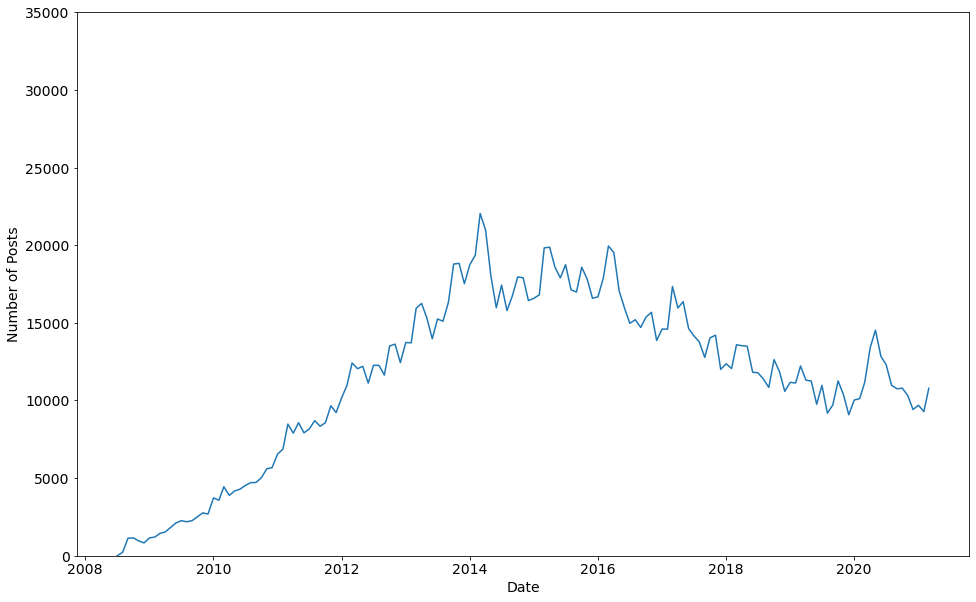

In [72]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(pivoted_data.index, pivoted_data["java"])


**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

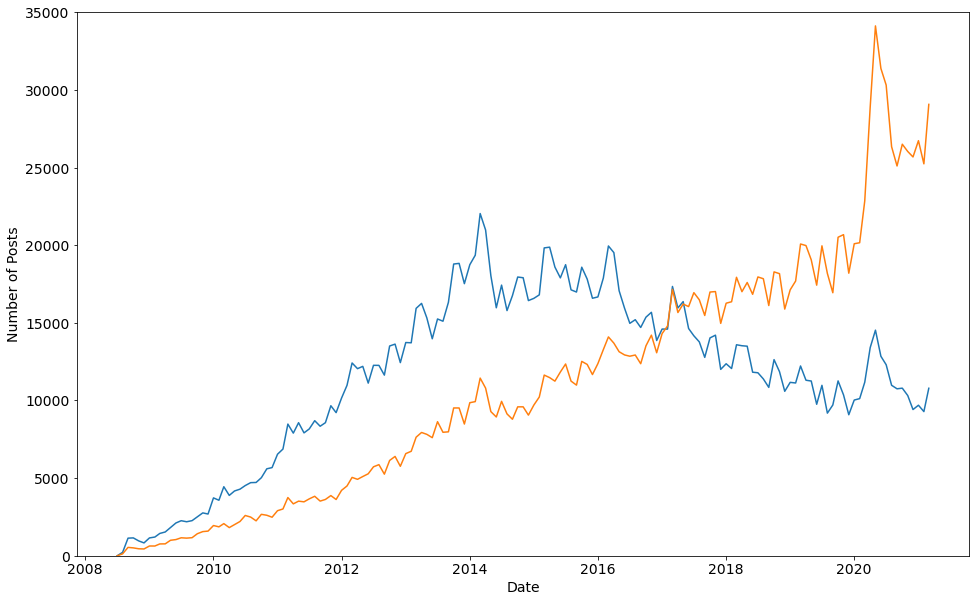

In [73]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(pivoted_data.index, pivoted_data["java"])
plt.plot(pivoted_data.index, pivoted_data.python)

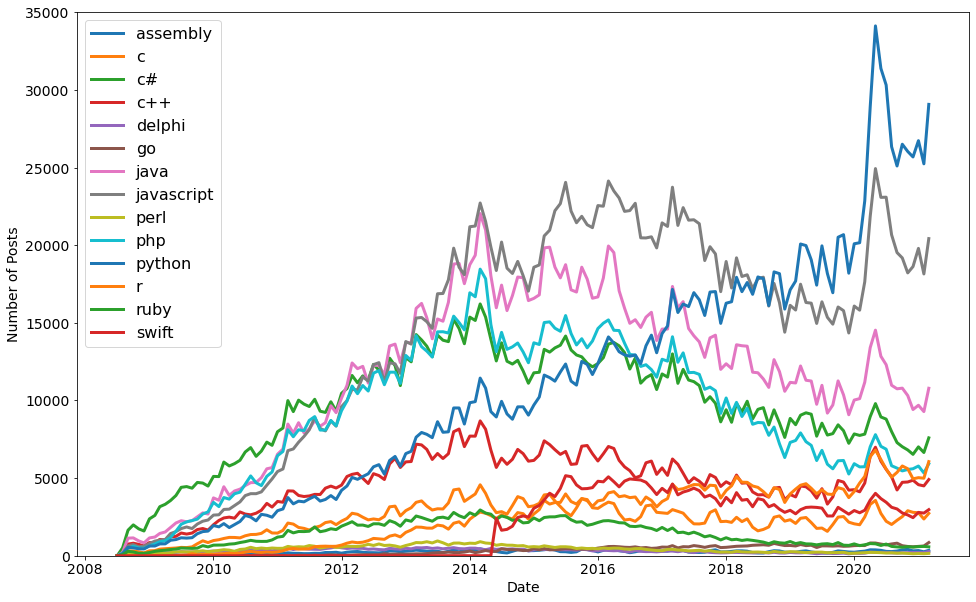

In [75]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in pivoted_data.columns:
    plt.plot(pivoted_data.index, pivoted_data[column], linewidth=3, label=pivoted_data[column].name)
plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [82]:
roll_df = pivoted_data.rolling(window=6).mean()

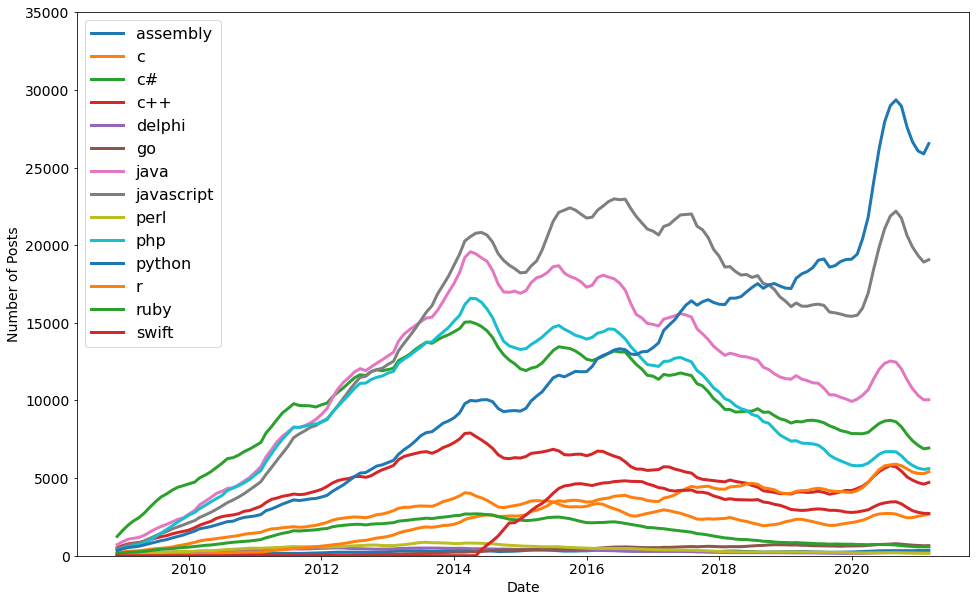

In [78]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)